Q4001 Thermodynamics of Materials <br>
<b>Class Activity 1</b>
<h3>
Osamu Katagiri Tanaka - A01212611@itesm.mx - CEM <br>
Diego Ceciliano Franco A01373414@itesm.mx - CEM <br>
Carlos Cardoso Isidoro A01750267@itesm.mx - CEM <br>
</h3>

In [2]:
#******************************************************************************#
# Futures
%matplotlib inline
# from __future__ import unicode_literals
# from __future__ import print_function

# Generic/Built-in
import datetime
import argparse

# Other Libs
from IPython.display import display, Image
#
from sympy import *
#
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)
#
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
#
from pint import UnitRegistry
u = UnitRegistry()
u.default_format = 'P'

# Owned
pfont = {'fontname':'Consolas'};
# from nostalgia_util import log_utils
# from nostalgia_util import settings_util
__authors__   = ["Osamu Katagiri - A01212611@itesm.mx"]
__copyright__ = "None"
__credits__   = ["Marcelo Videa - mvidea@itesm.mx"]
__license__   = "None"
__status__    = "Under Work"
#******************************************************************************#

## Phase Diagram - Class Activity
___

### Solid-liquid line (Clapeyron Eq.)
The pressure-temperature boundary at the solid-liquid phase boundary is approximately

$$ P(T) = P^∗ + \frac{\Delta \bar{H}_{melt}}{\Delta \bar{V}_{melt}} Ln \left(\frac{T}{T^*}\right) $$

where: $Ln$ is the natural logarithm, $T^∗$ is a reference tempearture, and $P^∗$ is the pressure at $T = T^∗$. Let use the triple point pressure and temperature as the reference pressure $P^∗$ and temperature $T^∗$, respectively, and calculate $P(T)$.

### Solid-gas line (Clausius-Clapeyron Eq.)
The pressure at the solid-gas boundary is approximated by

$$ P(T) = P e^{\frac{\Delta \bar{H}_{sub}}{R} \left(\frac{1}{T^*} - \frac{1}{T}\right)} $$

$T^*$ is a reference tempearture, and $P^∗$ is the pressure at $T = T^∗$, and assuming that the presure of the gas is described by the ideal-gas law.

### Liguid-gas line (Clausius-Clapeyron Eq.)
The pressure at the liquid-gas boundary is approximated by

$$ P(T) = P e^{\frac{\Delta \bar{H}_{vap}}{R} \left(\frac{1}{T^*} - \frac{1}{T}\right)} $$

$T^∗$ is a reference temperature, and $P^∗$ is the pressure at $T = T^∗$, assuming that the presure of the gas is described by the ideal-gas law. Look at temperature extending from the triple point up to the critical point. Plot using the triple point as the reference point.

In [3]:
def plotPhaseDiagram_(T_trip, P_trip, T_boil, P_boil, T_crit, P_crit, H_melt, V_melt, H_vap, H_sub, T_melt, T_vap, T_sub, pName):
    # solid-liquid phase boundary
    constant_melt = H_melt/(V_melt)                       # constant
    constant_melt.ito_base_units()                        # convert constant to base units
    P_melt = P_trip + constant_melt*np.log(T_melt/T_trip) # array of pressure point

    # liquid-gas phase boundary
    constant_vap = H_vap/R                          # constant
    constant_vap.ito_base_units()                   # .. converted to base units
    T_vap_reduced = constant_vap*(1/T_trip-1/T_vap) # reduced temperature .. the exponent
    T_vap_reduced.to_base_units()                   # .. converted to base units
    P_vap = P_trip*np.exp(T_vap_reduced)            # array of pressure

    # solid-gas phase boundary
    constant_sub = H_sub/R                          # constant
    constant_sub.ito_base_units()                   # constant converted to base units
    T_sub_reduced = constant_sub*(1/T_trip-1/T_sub) # reduced temperature -> the exponent eqn above
    T_sub_reduced.ito_base_units()                  # the reduced temperature converted to base units
    P_sub = P_trip*np.exp(T_sub_reduced)            # the pressure

    # PLOT
    scale = 6;
    fig, axs = plt.subplots(1,3,figsize=(3*scale, 2*scale/3));
    axs[0].plot(T_melt/u.K,P_melt/u.Pa, '-', linewidth=3, label='Solid-Liquid Boundary')
    axs[0].scatter([T_trip/u.K],[P_trip/u.Pa],s=100, color='c', label='Triple Point')
    axs[0].set_title('Solid-Liquid Boundary')
    axs[0].ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    axs[1].plot(T_vap/u.K,(P_vap/u.Pa).to_base_units(), '-c', linewidth=3, label='Liquid-Gas Boundary')
    axs[1].scatter([T_trip/u.K],[P_trip/u.Pa],s=100, color='c', label='Triple Point')
    axs[1].scatter([T_crit/u.K],[P_crit/u.Pa],s=100, label='Critical Point')
    axs[1].set_title('Liquid-Gas Boundary')
    axs[1].ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    axs[2].plot(T_sub/u.K,P_sub/u.Pa, '-g', linewidth=3, label='Solid-Gas Boundary')
    axs[2].scatter([T_trip/u.K],[P_trip/u.Pa],s=100, color='c', label='Triple Point')
    axs[2].set_title('Solid-Gas Boundary')
    axs[2].ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    display(plt);
    
    scale = 6;
    fig, ax = plt.subplots(figsize=(3*scale, 2*scale));
    # Boundary curves
    plt.plot(T_melt/u.K,P_melt/u.Pa, '-', linewidth=3, label='Solid-Liquid Phase Boundary')
    plt.plot(T_vap/u.K,(P_vap/u.Pa).to_base_units(), '-c', linewidth=3, label='Liquid-Gas Phase Boundary')
    #plt.plot(T_vap2/u.K,(P_vap/u.Pa).to_base_units(), '--', linewidth=3, label='Liquid-Gas Phase Boundary')
    plt.plot(T_sub/u.K,P_sub/u.Pa, '-g', linewidth=3, label='Solid-Gas Phase Boundary')

    # Triple and critical points
    plt.scatter([T_crit/u.K],[P_crit/u.Pa],s=100, label='Critical Point')
    plt.scatter([T_trip/u.K],[P_trip/u.Pa],s=100, color='c', label='Triple Point')
    plt.scatter([T_boil/u.K],[P_boil/u.Pa],s=100, color='g', label='Boiling Point')
    
    # Plot config
    plt.xscale('linear')
    plt.yscale('linear')
    plt.xlabel(r'$T$' + '    ' + r'$[K]$', fontsize=24, **pfont);
    plt.ylabel(r'$P$' + '    ' + r'$[Pa]$', fontsize=24, **pfont);
    plt.title(pName + ' calculated Phase Diagram', size=24, **pfont);
    plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    plt.legend(prop={'size': 18});
    #plt.annotate('solid', xy=(750,-250e6), xycoords='data', fontsize=20, **pfont)
    #plt.annotate('liquid', xy=(1100,-250e6), xycoords='data', fontsize=20, **pfont)
    #plt.annotate('gas', xy=(850,50e6), xycoords='data', fontsize=20, **pfont)
    #plt.ylim(-2.5e9, 0.125e9)
    #display(plt);

### $C O_2$ Phase Diagram

<module 'matplotlib.pyplot' from 'C:\\Users\\oskat\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

<module 'matplotlib.pyplot' from 'C:\\Users\\oskat\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

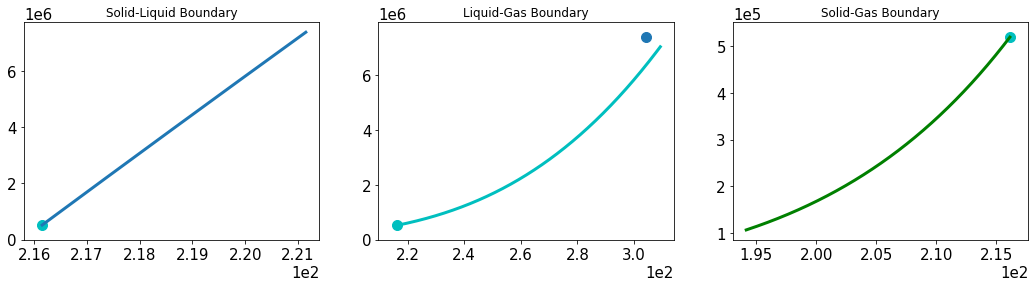

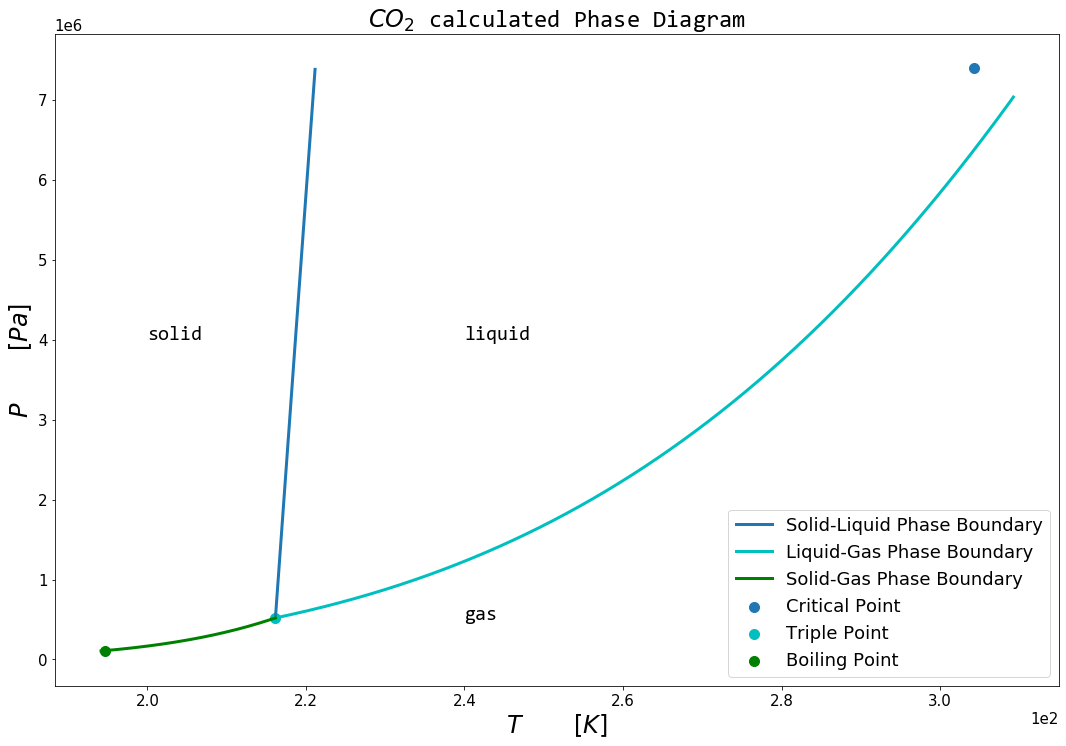

In [5]:
# the temperature and pressure at three important reference points in the water phase
# diagram http://marohn-public.site44.com/Marohn-20180418-005000-Phase-Diagram.html
# (T,P) at the triple point
T_trip = 216.15*u.K
P_trip = 520000*u.Pa

# (T,P) at the P = 1 atm boiling point 
T_boil = 194.686*u.K
P_boil = 101325*u.Pa

# (T,P) at the critical point
T_crit = 304.25*u.K
P_crit = 7397000*u.Pa

# the molar enthalpy (H), molar entropy (S). and molar volume (V) for undergoing
# melting, vaporization, and sublimation at the critical point.

# melting: solid to liquid
H_melt = 8.3*u.kJ/u.mol
V_melt = 27.658*u.cc/u.mol
# vaporization: liquid to gas
H_vap = 15.55*u.kJ/u.mol
# sublimation: solid to vapor
H_sub = 25.2*u.kJ/u.mol

# array of temp points
T_melt = np.linspace(T_trip.magnitude,T_trip.magnitude+5,1000)*u.K
T_vap = np.linspace(T_trip.magnitude,T_crit.magnitude+5,1000)*u.K
T_sub = np.linspace(T_trip.magnitude-22,T_trip.magnitude,1000)*u.K

# gas constant
R = 8.314*u.J/(u.mol*u.K)

# plot
plotPhaseDiagram_(T_trip, P_trip, T_boil, P_boil, T_crit, P_crit, H_melt, V_melt, H_vap, H_sub, T_melt, T_vap, T_sub, r'$C O_2$');
plt.annotate('solid', xy=(200,4e6), xycoords='data', fontsize=20, **pfont)
plt.annotate('liquid', xy=(240,4e6), xycoords='data', fontsize=20, **pfont)
plt.annotate('gas', xy=(240,0.5e6), xycoords='data', fontsize=20, **pfont)
#plt.xlim(900, 1400)
#plt.ylim(-1e9, 0.125e9)
display(plt);

### Paper Trail
---

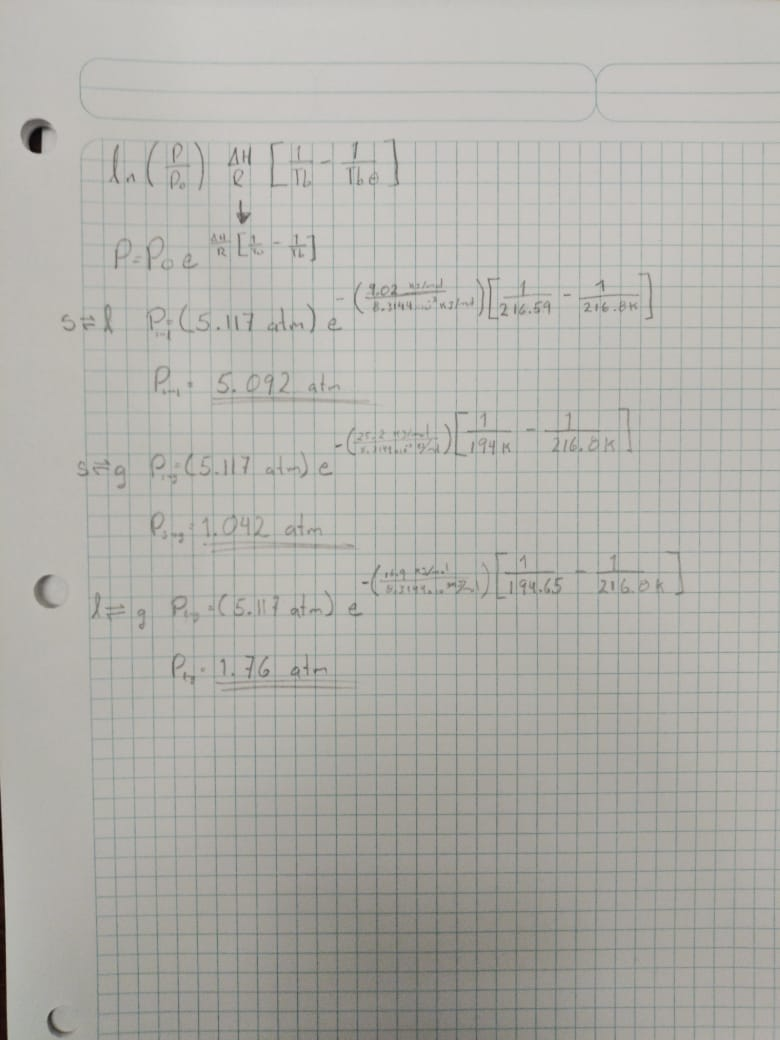

In [7]:
display(Image(filename='./paper0.jpeg'))